In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
#pip install tensorflow_datasets

In [3]:
### Read the dataset :imdb

imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [4]:
train_data , test_data = imdb["train"], imdb["test"]
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [5]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [6]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

#training_labels



In [7]:
# info


In [8]:
training_sentences[3]

"b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'"

In [9]:
training_labels[3]

1

In [10]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [11]:
len(training_sentences) , len(testing_sentences)

(25000, 25000)

In [12]:
training_labels_final.size , testing_labels_final.size

(25000, 25000)

In [13]:
vocab_size = 10000
embedded_dim =16
max_length =120
trunc_type='post'

In [14]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words= vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index
len(word_index)

86538

In [15]:
word_index;


In [16]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)


In [17]:
len(sequences),len(sequences[0])

(25000, 110)

In [18]:
len(padded[0])

120

In [19]:
padded.shape,testing_padded.shape

((25000, 120), (25000, 120))

In [20]:
padded.dtype

dtype('int32')

##### Build the simple RNN model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM , SimpleRNN, Embedding

In [22]:
model_rnn =Sequential([
    Embedding(vocab_size, embedded_dim, input_length= max_length),
    SimpleRNN(32),
    Dense(10, activation= 'relu'),
    Dense(1, activation='sigmoid')
])
model_rnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161909 (632.46 KB)
Trainable params: 161909 (632.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
#help(SimpleRNN);

### Compile the RNN model

In [24]:
model_rnn.compile(loss='binary_crossentropy',
                optimizer='adam', 
                metrics=['accuracy'])

In [25]:
history=model_rnn.fit(padded,training_labels_final, epochs=10,validation_data=(testing_padded, testing_labels_final))

Epoch 1/10



782/782 [==============================] - 31s 37ms/step - loss: 0.6934 - accuracy: 0.5070 - val_loss: 0.6935 - val_accuracy: 0.5149
Epoch 2/10
782/782 [==============================] - 30s 39ms/step - loss: 0.6649 - accuracy: 0.6003 - val_loss: 0.6717 - val_accuracy: 0.5795
Epoch 3/10
782/782 [==============================] - 29s 37ms/step - loss: 0.5519 - accuracy: 0.7213 - val_loss: 0.7501 - val_accuracy: 0.5921
Epoch 4/10
782/782 [==============================] - 28s 35ms/step - loss: 0.3394 - accuracy: 0.8582 - val_loss: 0.6446 - val_accuracy: 0.7246
Epoch 5/10
782/782 [==============================] - 28s 35ms/step - loss: 0.1666 - accuracy: 0.9400 - val_loss: 0.8272 - val_accuracy: 0.6941
Epoch 6/10
782/782 [==============================] - 28s 36ms/step - loss: 0.0789 - accuracy: 0.9744 - val_loss: 1.0348 - val_accuracy: 0.7030
Epoch 7/10
782/782 [==============================] - 29s 37ms/step - loss: 0.0656 - accuracy: 0.9762 - val_loss: 1.2501 - val_accuracy: 0.6989
Epo

In [26]:
import matplotlib.pyplot as plt

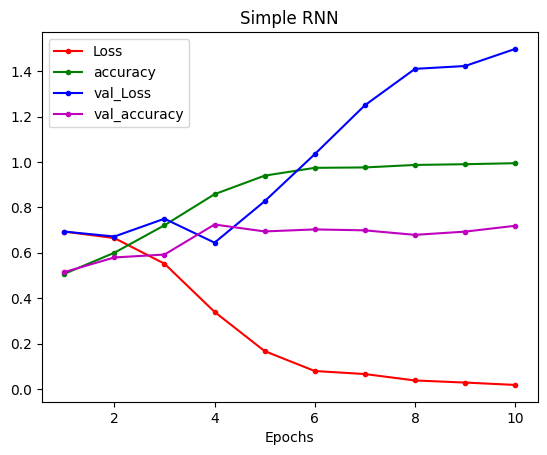

In [27]:
plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.plot(range(1,11), history.history['loss'], color='r', label='Loss',marker='.')
plt.plot(range(1,11), history.history['accuracy'], color='g', label='accuracy',marker='.')
plt.plot(range(1,11), history.history['val_loss'], color='b', label='val_Loss',marker='.')
plt.plot(range(1,11), history.history['val_accuracy'], color='m', label='val_accuracy',marker='.')
plt.legend(loc='upper left')

In [28]:
history.history

{'loss': [0.6933565735816956,
  0.6648683547973633,
  0.5519230365753174,
  0.33943846821784973,
  0.16662976145744324,
  0.0789303183555603,
  0.06558483093976974,
  0.03728310391306877,
  0.02805422432720661,
  0.01765139028429985],
 'accuracy': [0.5070400238037109,
  0.6002799868583679,
  0.7212799787521362,
  0.8582000136375427,
  0.9399999976158142,
  0.974399983882904,
  0.9761599898338318,
  0.9871199727058411,
  0.9903600215911865,
  0.9948400259017944],
 'val_loss': [0.6934976577758789,
  0.6716618537902832,
  0.7501106858253479,
  0.6445848941802979,
  0.8272308707237244,
  1.0347720384597778,
  1.2501401901245117,
  1.410598635673523,
  1.4231631755828857,
  1.4984627962112427],
 'val_accuracy': [0.5148800015449524,
  0.579479992389679,
  0.5921199917793274,
  0.724560022354126,
  0.6940799951553345,
  0.703000009059906,
  0.6988800168037415,
  0.6790000200271606,
  0.6932799816131592,
  0.718999981880188]}

#### Build the model for lstm

In [29]:
from keras.layers import Bidirectional, GRU, LSTM

In [30]:
model_lstm =Sequential([
    Embedding(vocab_size, embedded_dim, input_length= max_length),
    Bidirectional(LSTM(32)),
    Dense(10, activation= 'relu'),
    Dense(1, activation='sigmoid')
])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model_lstm.compile(loss='binary_crossentropy',
                optimizer='adam', 
                metrics=['accuracy'])

#### Train LSTM Model

In [32]:
history_lstm=model_lstm.fit(padded,training_labels_final, epochs=10,validation_data=(testing_padded, testing_labels_final))


Epoch 1/10
782/782 [==============================] - 55s 64ms/step - loss: 0.4712 - accuracy: 0.7658 - val_loss: 0.4250 - val_accuracy: 0.8187
Epoch 2/10
782/782 [==============================] - 48s 61ms/step - loss: 0.2829 - accuracy: 0.8863 - val_loss: 0.4096 - val_accuracy: 0.8417
Epoch 3/10
782/782 [==============================] - 48s 61ms/step - loss: 0.2205 - accuracy: 0.9154 - val_loss: 0.4624 - val_accuracy: 0.8352
Epoch 4/10
782/782 [==============================] - 48s 61ms/step - loss: 0.1803 - accuracy: 0.9338 - val_loss: 0.4981 - val_accuracy: 0.8332
Epoch 5/10
782/782 [==============================] - 47s 61ms/step - loss: 0.1482 - accuracy: 0.9467 - val_loss: 0.5575 - val_accuracy: 0.8240
Epoch 6/10
782/782 [==============================] - 47s 61ms/step - loss: 0.1259 - accuracy: 0.9540 - val_loss: 0.6611 - val_accuracy: 0.8173
Epoch 7/10
782/782 [==============================] - 47s 60ms/step - loss: 0.0921 - accuracy: 0.9686 - val_loss: 0.5412 - val_accuracy:

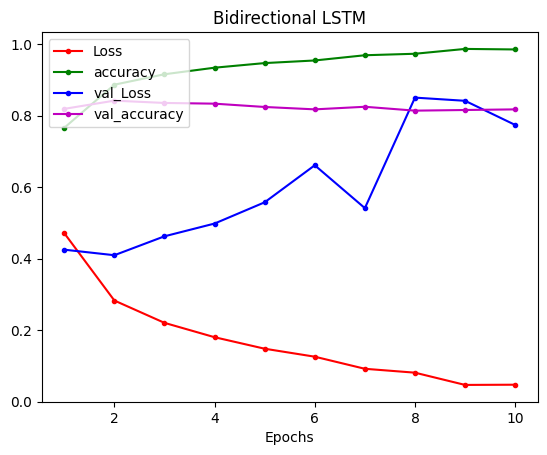

In [33]:
plt.title('Bidirectional LSTM')
plt.xlabel('Epochs')
plt.plot(range(1,11), history_lstm.history['loss'], color='r', label='Loss',marker='.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='g', label='accuracy',marker='.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color='b', label='val_Loss',marker='.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color='m', label='val_accuracy',marker='.')
plt.legend(loc='upper left')

### Build Model for GRU

In [34]:
model_gru =Sequential([
    Embedding(vocab_size, embedded_dim, input_length= max_length),
    Bidirectional(GRU(32)),
    Dense(10, activation= 'relu'),
    Dense(1, activation='sigmoid')
])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compile GRU model

In [35]:
model_gru.compile(loss='binary_crossentropy',
                optimizer='adam', 
                metrics=['accuracy'])

### Train GRU model

In [36]:
history_gru=model_gru.fit(padded,training_labels_final, epochs=10,validation_data=(testing_padded, testing_labels_final))


Epoch 1/10
782/782 [==============================] - 58s 69ms/step - loss: 0.4902 - accuracy: 0.7419 - val_loss: 0.3389 - val_accuracy: 0.8528
Epoch 2/10
782/782 [==============================] - 52s 67ms/step - loss: 0.2815 - accuracy: 0.8859 - val_loss: 0.3511 - val_accuracy: 0.8458
Epoch 3/10
782/782 [==============================] - 52s 67ms/step - loss: 0.2140 - accuracy: 0.9174 - val_loss: 0.3933 - val_accuracy: 0.8402
Epoch 4/10
782/782 [==============================] - 52s 66ms/step - loss: 0.1628 - accuracy: 0.9418 - val_loss: 0.4373 - val_accuracy: 0.8325
Epoch 5/10
782/782 [==============================] - 52s 67ms/step - loss: 0.1145 - accuracy: 0.9597 - val_loss: 0.5327 - val_accuracy: 0.8305
Epoch 6/10
782/782 [==============================] - 52s 67ms/step - loss: 0.0780 - accuracy: 0.9738 - val_loss: 0.6819 - val_accuracy: 0.8160
Epoch 7/10
782/782 [==============================] - 52s 66ms/step - loss: 0.0515 - accuracy: 0.9830 - val_loss: 0.7119 - val_accuracy:

#### Plotting the Graph

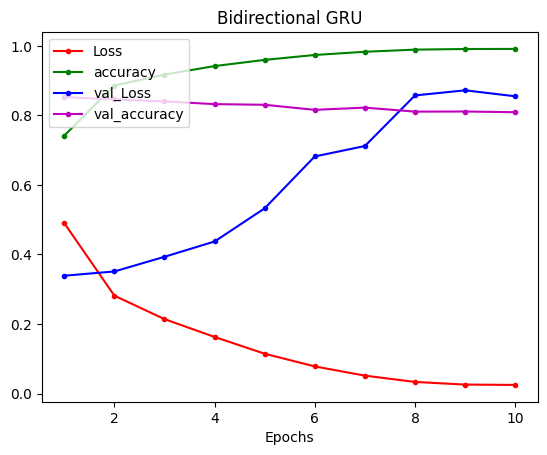

In [37]:
plt.title('Bidirectional GRU')
plt.xlabel('Epochs')
plt.plot(range(1,11), history_gru.history['loss'], color='r', label='Loss',marker='.')
plt.plot(range(1,11), history_gru.history['accuracy'], color='g', label='accuracy',marker='.')
plt.plot(range(1,11), history_gru.history['val_loss'], color='b', label='val_Loss',marker='.')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color='m', label='val_accuracy',marker='.')
plt.legend(loc='upper left')

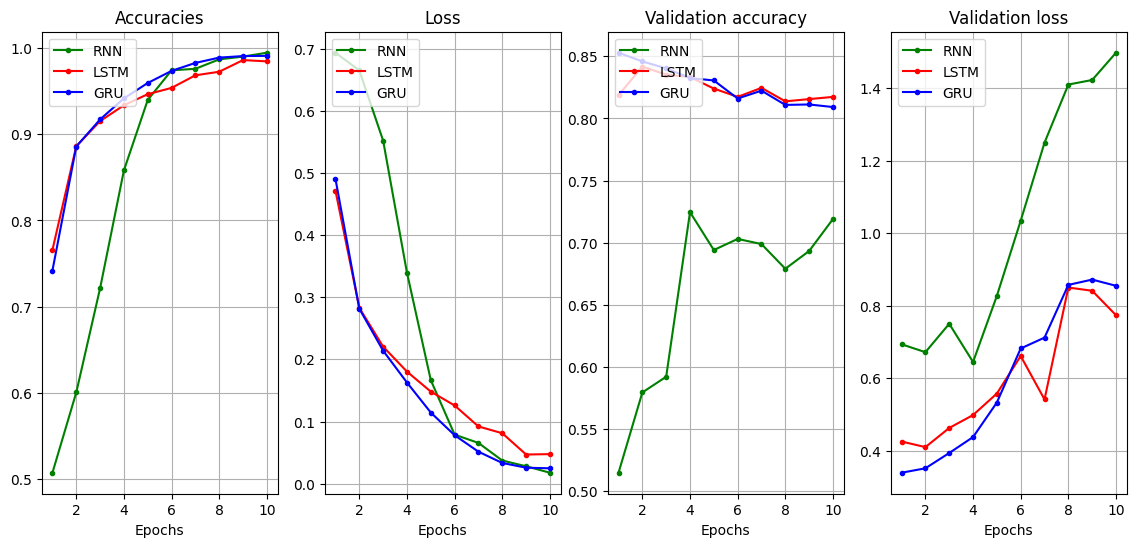

In [45]:
plt.figure(figsize=(14,6))
plt.subplot(1,4,1)
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['accuracy'], color='g', label='RNN',marker='.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='r', label='LSTM',marker='.')
plt.plot(range(1,11), history_gru.history['accuracy'], color='b', label='GRU',marker='.')
plt.legend(loc='upper left')

plt.subplot(1,4,2)
plt.title('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['loss'], color='g', label='RNN',marker='.')
plt.plot(range(1,11), history_lstm.history['loss'], color='r', label='LSTM',marker='.')
plt.plot(range(1,11), history_gru.history['loss'], color='b', label='GRU',marker='.')
plt.legend(loc='upper left')

plt.subplot(1,4,3)
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['val_accuracy'], color='g', label='RNN',marker='.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color='r', label='LSTM',marker='.')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color='b', label='GRU',marker='.')
plt.legend(loc='upper left')

plt.subplot(1,4,4)
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['val_loss'], color='g', label='RNN',marker='.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color='r', label='LSTM',marker='.')
plt.plot(range(1,11), history_gru.history['val_loss'], color='b', label='GRU',marker='.')
plt.legend(loc='upper left')

In [64]:
new1 = 'This was worst movie. Please do not watch it. Waste of money and time '
new2 = 'A must watch movie. I loved to watch it. It was just amazing.'

In [65]:
def predict_sentiment(model, text):
  seq = tokenizer.texts_to_sequences([text])
  pad = pad_sequences(seq, maxlen=max_length , truncating=trunc_type)
  result= model.predict(pad, verbose= False)
  percent_pos= result[0,0]
  if round(percent_pos) == 0:
    return ((1-percent_pos) , 'NEGATIVE')
  else:
    return (percent_pos , 'POSITIVE')

In [70]:
predict_sentiment(model_rnn, new1) , predict_sentiment(model_rnn,new2)

((0.9996298186597414, 'NEGATIVE'), (0.9998294, 'POSITIVE'))

In [67]:
predict_sentiment(model_lstm, new1) , predict_sentiment(model_lstm,new2)

((0.9995412858843338, 'NEGATIVE'), (0.99017894, 'POSITIVE'))

In [69]:
predict_sentiment(model_gru, new1) , predict_sentiment(model_gru,new2)

((0.9999986666935001, 'NEGATIVE'), (0.99992657, 'POSITIVE'))

#### Toxic comments